In [346]:
from pynq import PL
from pynq import Overlay
from pynq import allocate

import numpy as np
import matplotlib.pyplot as plt

In [410]:
PL.reset()
xadc_stream = Overlay('circular_2.bit')

dma      = xadc_stream.axi_dma_0
dma_dpp  = xadc_stream.axi_dma_1
xgpio    = xadc_stream.hier_gpio.axi_gpio_0
xsel     = xadc_stream.hier_gpio.axi_gpio_sel
xtrapz   = xadc_stream.hier_gpio.axi_gpio_trapz
xcount   = xadc_stream.hier_gpio.axi_gpio_count
xcmp     = xadc_stream.hier_gpio.axi_gpio_dpp_cmp
xamp     = xadc_stream.hier_gpio.axi_gpio_amp
xrst     = xadc_stream.hier_rst.axi_gpio_rst
#xgpiol = xadc_stream.axi_gpio_low
#xgpioh = xadc_stream.axi_gpio_high

In [411]:
xgpio.write(0,2000)
xcmp.write(0,50000)
xrst.write(0,0)
xrst.write(0,7)

In [412]:
xsel.write(0,0)
xrst.write(0,15)

In [413]:
buff_deep = 8300
dpp_deep  = 2300

input_buffer = allocate(shape=(buff_deep,), dtype=np.uint32)
input_bufdpp = allocate(shape=(dpp_deep,), dtype=np.uint32)

In [414]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

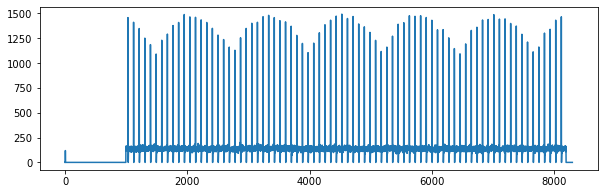

In [415]:
plt.figure(figsize=(10,3))
plt.plot(range(0, buff_deep), input_buffer1)
##plt.xlim(0, 4000)
plt.show()

In [353]:
print(np.sum(input_buffer))

1163041


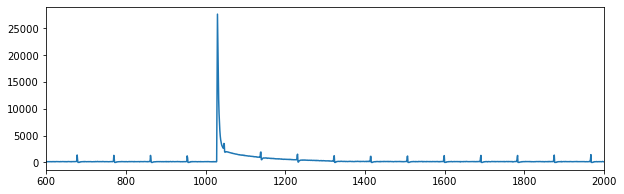

Suma de histograma =  1556994


In [416]:
xsel.write(0,0)
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

plt.figure(figsize=(10,3))
#plt.bar(range(0, 8300), input_buffer1)#, edgecolor='black')
plt.plot(range(0, buff_deep), input_buffer1)
plt.xlim(600, 2000)
plt.show()

#print("Numero de conteos = ", xgpio.read(8))
print("Suma de histograma = ", np.sum(input_buffer))

In [355]:
print(input_buffer)

[132 132 144 ...   0   0   0]


In [356]:
xsel.write(0,1)

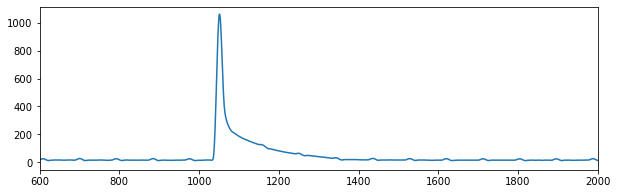

Suma de histograma =  183097


In [419]:
xsel.write(0,1)
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

plt.figure(figsize=(10,3))
#plt.bar(range(0, 8300), input_buffer1)#, edgecolor='black')
plt.plot(range(0, buff_deep), input_buffer1)
plt.xlim(600, 2000)
plt.show()

#print("Numero de conteos = ", xgpio.read(8))
print("Suma de histograma = ", np.sum(input_buffer))

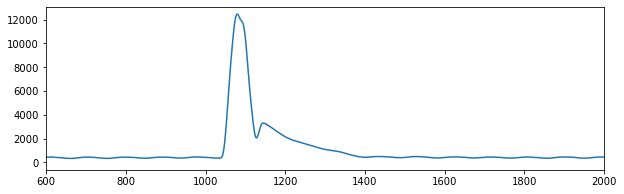

Suma de histograma =  4305796


In [421]:
xsel.write(0,2)
xtrapz.write(0,6)
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
#for i in range(len(input_buffer1)):
#    if input_buffer1[i]>0.5:
#        input_buffer1[i] = input_buffer1[i]-1

plt.figure(figsize=(10,3))
#plt.bar(range(0, 8300), input_buffer1)#, edgecolor='black')
plt.plot(range(0, buff_deep), input_buffer1)
plt.xlim(600, 2000)
plt.show()

#print("Numero de conteos = ", xgpio.read(8))
print("Suma de histograma = ", np.sum(input_buffer))

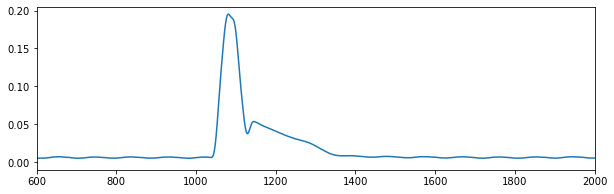

Suma de histograma =  4480025


In [423]:
xsel.write(0,2)
xtrapz.write(0,6)
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer/2**16
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

plt.figure(figsize=(10,3))
#plt.bar(range(0, 8300), input_buffer1)#, edgecolor='black')
plt.plot(range(0, buff_deep), input_buffer1)
plt.xlim(600, 2000)
plt.show()

#print("Numero de conteos = ", xgpio.read(8))
print("Suma de histograma = ", np.sum(input_buffer))

In [360]:
print("Numero de conteos = ", xcount.read(0))

Numero de conteos =  0


In [424]:
xrst.write(0,7)

In [425]:
xrst.write(0,15)

In [428]:
xtrapz.write(0,6)

In [429]:
xamp.read(0)

787

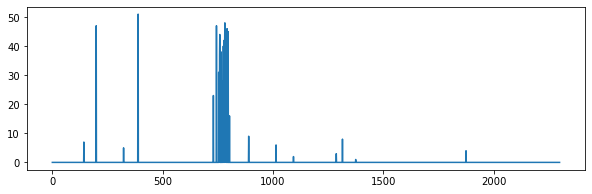

Numero de conteos =  52
Suma de histograma =  1060


In [430]:
dma_dpp.recvchannel.transfer(input_bufdpp)
#input_buffer1 = input_buffer/2**16

plt.figure(figsize=(10,3))
#plt.bar(range(0, dpp_deep), input_bufdpp)#, edgecolor='black')
plt.plot(range(0, dpp_deep), input_bufdpp)
#plt.xlim(600, 2000)
#plt.ylim(-1, 20)
plt.show()

print("Numero de conteos = ", xcount.read(0))
print("Suma de histograma = ", np.sum(input_bufdpp))